In [5]:
import numpy as np
from ultralytics import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
model1 = YOLO("best (1).pt")
model2 = YOLO("best_classify_plants (1).pt")

In [7]:
def process_image(image_path):
    # Run detection
    results = model1(image_path)
    
    detections = []
    
    for result in results:
        # Get original image
        image = result.orig_img
        image_array = np.array(image)
        
        # Process each detection
        for i, box in enumerate(result.boxes.xywh):
            x, y, w, h = box
            
            # Crop detected tree
            cropped_image = image_array[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]
            
            # Classify cropped image
            classification_result = model2(cropped_image)
            tree_class = classification_result[0].names[classification_result[0].probs.top1]
            
            detections.append({
                'box': (x, y, w, h),
                'class': tree_class
            })
            
            # Draw rectangle on original image
            cv2.rectangle(
                image_array,
                (int(x-w/2), int(y-h/2)),
                (int(x+w/2), int(y+h/2)),
                (0, 255, 0),
                2
            )
            
            # Add text label
            cv2.putText(
                image_array,
                tree_class,
                (int(x-w/2), int(y-h/2)-10),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.5,
                (0, 255, 0),
                2
            )
    
    return detections, image_array


image 1/1 c:\Users\sheno\OneDrive\Desktop\mjpr\street_view_detection_180.jpg: 800x800 5 trees, 371.0ms
Speed: 10.0ms preprocess, 371.0ms inference, 0.0ms postprocess per image at shape (1, 3, 800, 800)

0: 128x128 images 1.00, labels 0.00, 8.0ms
Speed: 15.2ms preprocess, 8.0ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 images 1.00, labels 0.00, 10.7ms
Speed: 3.3ms preprocess, 10.7ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 images 1.00, labels 0.00, 8.8ms
Speed: 2.6ms preprocess, 8.8ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 images 1.00, labels 0.00, 7.8ms
Speed: 6.1ms preprocess, 7.8ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 images 1.00, labels 0.00, 11.6ms
Speed: 7.4ms preprocess, 11.6ms inference, 0.0ms postprocess per image at shape (1, 3, 128, 128)
Detection Results:

Tree 1:
Class: images
Location: x=325.4, y=176.1

Tree 2:
Class: images


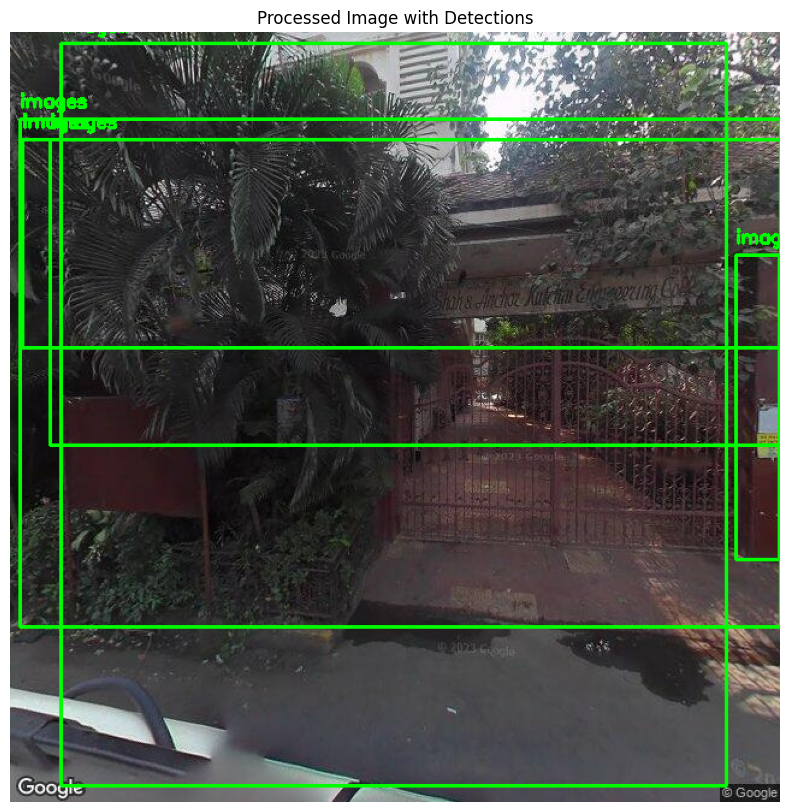

True

In [9]:
image_path = "street_view_detection_180.jpg"
detections, processed_image = process_image(image_path)

# Print detection results
print("Detection Results:")
for i, detection in enumerate(detections):
    print(f"\nTree {i+1}:")
    print(f"Class: {detection['class']}")
    print(f"Location: x={detection['box'][0]:.1f}, y={detection['box'][1]:.1f}")

# Display the processed image using matplotlib
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(processed_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Processed Image with Detections')
plt.show()

# Save the processed image
cv2.imwrite('processed_image.jpg', processed_image)